# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Hafizha Aghnia Hasya
- **Email:** 	mc006d5x2114@student.devacademy.id
- **ID Dicoding:** MC006D5X2114

## Menentukan Pertanyaan Bisnis

Analisis data dilakukan untuk menjawab tantangan atau permasalahan bisnis. Oleh karena itu, diperlukan untuk **mengurai masalah tersebut ke dalam beberapa pertanyaan bisnis untuk dianalisis**. Jika data merupakan building block dalam proyek analisis data, kita dapat menganggap pertanyaan analisis sebagai kompas yang selalu mengarahkan untuk menuju goals dan objektif yang ingin dicapai.

Maka dari itu, pertanyaan bisnis harus efektif yang bersifat :
- **Specific** : spesifik, di mana pertanyaan harus fokus pada satu topik tertentu
- **Measurable** : pertanyaan harus dapat diukur
- **Action-oriented** : pertanyaan mampu memberikan informasi yang membantu pembuatan/perencanaan langkah selanjutnya
- **Relevant** : pertanyaan harus berbobot atau memiliki arti untuk menyelesaikan sebuah masalah
- **Time-bound** : pertanyaan perlu relevan terhadap waktu saat ini

Dari uraian di atas, maka dibuat pertanyaan bisnis sebagai berikut :

1. **Bagaimana tren jumlah pesanan pada e-commerce dalam beberapa bulan terakhir (tahun 2018)?**
2. **Bagaimana performa seller berdasarkan jumlah pesanan dan rating pelanggan?**
3. **Bagaimana distribusi geografis seller berdasarkan kode pos dan koordinat?**

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import folium
from folium.plugins import MarkerCluster

from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

import gc

## Data Wrangling

Data wrangling adalah tahap penting yang dilakukan sebelum data digunakan dalam proses analisis data.
Data wrangling merupakan sebuah proses yang meliputi : 
- Pengumpulan data (**Gathering data**)
- Penilaian data (**Assessing data**)
- Pembersihan data (**Cleaning data**)

### Gathering Data

Gathering Data bertujuan **mengumpulkan informasi/data** yang relevan terhadap permasalahan yang ingin dijawab. <br>
Pada tahap ini, dilakukan import dataset yang diperlukan untuk menjawab pertanyaan bisnis yang sudah ditetapkan sebelumnya

In [2]:
# import dataset orders
orders_df = pd.read_csv('data/orders_dataset.csv')
orders_df.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

In [3]:
# import dataset order item
order_items_df = pd.read_csv('data/order_items_dataset.csv')
order_items_df.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.79  
4  2017-02-13 13:57:51  199.90          18.14

In [4]:
# import dataset order reviews
order_reviews_df = pd.read_csv('data/order_reviews_dataset.csv')
order_reviews_df.head()

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3              Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4  Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53

In [5]:
# import dataset sellers
sellers_df = pd.read_csv('data/sellers_dataset.csv')
sellers_df.head()

seller_id  seller_zip_code_prefix  \
0  3442f8959a84dea7ee197c632cb2df15                   13023   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   

         seller_city seller_state  
0           campinas           SP  
1         mogi guacu           SP  
2     rio de janeiro           RJ  
3          sao paulo           SP  
4  braganca paulista           SP

In [6]:
# import dataset geolocation
geolocation_df = pd.read_csv('data/geolocation_dataset.csv')
geolocation_df.head()

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
3                         1041       -23.544392       -46.639499   
4                         1035       -23.541578       -46.641607   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP

Pada proyek ini, digunakan dataframe berikut
- **order_items_df** : mencakup informasi produk yang dibeli pada setiap order 
- **orders_df** : mencakup informasi mengenai order pada e-commerce
- **order_reviews_df** : mencakup review, termasuk rating, yang diberikan pelanggan
- **sellers_df** : mencakup informasi mengenai seller pada e-commerce
- **geolocation_df** : mencakup informasi zip code dan koordinat di Brazil

### Assessing Data

Setelah data yang dibutuhkan terkumpul, kita masuk ke tahap Assessing Data yaitu **penilaian kualitas dan struktur dari sebuah data**. <br>
Pada tahap ini, selain dilakukan penilaian terhadap data, juga untuk **mengidentifikasi berbagai masalah yang terdapat dalam data**, seperti missing value, kesalahan tipe data, unstandard value, dan sebagainya. <br>
Pada proyek ini, assessing data dilakukan dengan : 
- .info() untuk melihat banyak baris, tipe data, dan nama fitur
- describe() untuk melihat descriptive statistics tiap fitur 
- mengecek missing value
- mengecek duplicated value

#### .info()

In [7]:
# mengecek banyak baris, tipe data, dan nama fitur

dataframes = [order_items_df, orders_df, order_reviews_df, sellers_df, geolocation_df]
df_names = ["order_items_df", "orders_df", "order_reviews_df", "sellers_df", "geolocation_df"]

for name, df in zip(df_names, dataframes):
    print(f"=== Info for {name} ===")
    df.info()
    print("\n")

=== Info for order_items_df ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


=== Info for orders_df ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id       

#### .describe()

In [8]:
# melihat descriptive statistics dataframe

dataframes = [order_items_df, orders_df, order_reviews_df, sellers_df, geolocation_df]
df_names = ["order_items_df", "orders_df", "order_reviews_df", "sellers_df", "geolocation_df"]

for name, df in zip(df_names, dataframes):
    print(f"=== desc stat for {name} ===")
    display(df.describe(include='all'))
    print("\n" + "="*100 + "\n")

=== desc stat for order_items_df ===


order_id  order_item_id  \
count                             112650  112650.000000   
unique                             98666            NaN   
top     8272b63d03f5f79c56e9e4120aec44ef            NaN   
freq                                  21            NaN   
mean                                 NaN       1.197834   
std                                  NaN       0.705124   
min                                  NaN       1.000000   
25%                                  NaN       1.000000   
50%                                  NaN       1.000000   
75%                                  NaN       1.000000   
max                                  NaN      21.000000   

                              product_id                         seller_id  \
count                             112650                            112650   
unique                             32951                              3095   
top     aca2eb7d00ea1a7b8ebd4e68314663af  6560211a19b47992c3666cc44a7e94c0   
freq                                 527                              2033   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

        shipping_limit_date          price  freight_value  
count                112650  112650.000000  112650.000000  
unique                93318            NaN            NaN  
top     2017-07-21 18:25:23            NaN            NaN  
freq                     21            NaN            NaN  
mean                    NaN     120.653739      19.990320  
std                     NaN     183.633928      15.806405  
min                     NaN       0.850000       0.000000  
25%                     NaN      39.900000      13.080000  
50%                     NaN      74.990000      16.260000  
75%                     NaN     134.900000      21.150000  
max                     NaN    6735.000000     409.680000



=== desc stat for orders_df ===


order_id                       customer_id  \
count                              99441                             99441   
unique                             99441                             99441   
top     e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
freq                                   1                                 1   

       order_status order_purchase_timestamp    order_approved_at  \
count         99441                    99441                99281   
unique            8                    98875                90733   
top       delivered      2018-04-11 10:48:14  2018-02-27 04:31:10   
freq          96478                        3                    9   

       order_delivered_carrier_date order_delivered_customer_date  \
count                         97658                         96476   
unique                        81018                         95664   
top             2018-05-09 15:48:00           2018-05-08 23:38:46   
freq                             47                             3   

       order_estimated_delivery_date  
count                          99441  
unique                           459  
top              2017-12-20 00:00:00  
freq                             522



=== desc stat for order_reviews_df ===


review_id                          order_id  \
count                              99224                             99224   
unique                             98410                             98673   
top     7b606b0d57b078384f0b58eac1d41d78  c88b1d1b157a9999ce368f218a407141   
freq                                   3                                 3   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

        review_score review_comment_title review_comment_message  \
count   99224.000000                11568                  40977   
unique           NaN                 4527                  36159   
top              NaN            Recomendo              Muito bom   
freq             NaN                  423                    230   
mean        4.086421                  NaN                    NaN   
std         1.347579                  NaN                    NaN   
min         1.000000                  NaN                    NaN   
25%         4.000000                  NaN                    NaN   
50%         5.000000                  NaN                    NaN   
75%         5.000000                  NaN                    NaN   
max         5.000000                  NaN                    NaN   

       review_creation_date review_answer_timestamp  
count                 99224                   99224  
unique                  636                   98248  
top     2017-12-19 00:00:00     2017-06-15 23:21:05  
freq                    463                       4  
mean                    NaN                     NaN  
std                     NaN                     NaN  
min                     NaN                     NaN  
25%                     NaN                     NaN  
50%                     NaN                     NaN  
75%                     NaN                     NaN  
max                     NaN                     NaN



=== desc stat for sellers_df ===


seller_id  seller_zip_code_prefix seller_city  \
count                               3095             3095.000000        3095   
unique                              3095                     NaN         611   
top     3442f8959a84dea7ee197c632cb2df15                     NaN   sao paulo   
freq                                   1                     NaN         694   
mean                                 NaN            32291.059451         NaN   
std                                  NaN            32713.453830         NaN   
min                                  NaN             1001.000000         NaN   
25%                                  NaN             7093.500000         NaN   
50%                                  NaN            14940.000000         NaN   
75%                                  NaN            64552.500000         NaN   
max                                  NaN            99730.000000         NaN   

       seller_state  
count          3095  
unique           23  
top              SP  
freq           1849  
mean            NaN  
std             NaN  
min             NaN  
25%             NaN  
50%             NaN  
75%             NaN  
max             NaN



=== desc stat for geolocation_df ===


geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
count                  1.000163e+06     1.000163e+06     1.000163e+06   
unique                          NaN              NaN              NaN   
top                             NaN              NaN              NaN   
freq                            NaN              NaN              NaN   
mean                   3.657417e+04    -2.117615e+01    -4.639054e+01   
std                    3.054934e+04     5.715866e+00     4.269748e+00   
min                    1.001000e+03    -3.660537e+01    -1.014668e+02   
25%                    1.107500e+04    -2.360355e+01    -4.857317e+01   
50%                    2.653000e+04    -2.291938e+01    -4.663788e+01   
75%                    6.350400e+04    -1.997962e+01    -4.376771e+01   
max                    9.999000e+04     4.506593e+01     1.211054e+02   

       geolocation_city geolocation_state  
count           1000163           1000163  
unique             8011                27  
top           sao paulo                SP  
freq             135800            404268  
mean                NaN               NaN  
std                 NaN               NaN  
min                 NaN               NaN  
25%                 NaN               NaN  
50%                 NaN               NaN  
75%                 NaN               NaN  
max                 NaN               NaN

#### Cek Missing Value

In [9]:
# mengecek missing value

dataframes = [order_items_df, orders_df, order_reviews_df, sellers_df, geolocation_df]
df_names = ["order_items_df", "orders_df", "order_reviews_df", "sellers_df", "geolocation_df"]

for name, df in zip(df_names, dataframes):
    print(f"=== Missing values in {name} ===")
    display(df.isnull().sum())
    print("\n" + "="*50 + "\n")

=== Missing values in order_items_df ===


order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64



=== Missing values in orders_df ===


order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64



=== Missing values in order_reviews_df ===


review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64



=== Missing values in sellers_df ===


seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64



=== Missing values in geolocation_df ===


geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

#### Cek Duplicated Data

In [10]:
# mengecek duplicated data

dataframes = [order_items_df, orders_df, order_reviews_df, sellers_df, geolocation_df]
df_names = ["order_items_df", "orders_df", "order_reviews_df", "sellers_df", "geolocation_df"]

for name, df in zip(df_names, dataframes):
    print(f"Duplicated data in {name} :")
    display(df.duplicated().sum())

Duplicated data in order_items_df :


0

Duplicated data in orders_df :


0

Duplicated data in order_reviews_df :


0

Duplicated data in sellers_df :


0

Duplicated data in geolocation_df :


261831

**Insight dari Assessing Data** berdasarkan fitur

orders_df :
- kesalahan tipe data pada fitur order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date (seharusnya datetime)
- terdapat missing value pada fitur order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date

order_items_df :
- kesalahan tipe data pada fitur shipping_limit_date (seharusnya datetime)

order_reviews_df :
- kesalahan tipe data pada fitur review_creation_date dan review_answer_timestamp (seharusnya timestamp)
- terdapat missing value pada fitur review_comment_title dan review_comment_message

sellers_df :
- none

geolocation_df :
- terdapat duplicated data

### Cleaning Data

Kita menemukan beberapa masalah pada beberapa dataframe, masalah tersebut harus dibersihkan sebelum dianalisis. <br>
Pada tahap Cleaning Data, dilakukan proses pembersihan data yang meliputi :
- *Define* : membuat rancangan tahapan serta metode pembersihan data berdasarkan masalah yang ditemukan dalam proses assessing data
- *Code* : mengonversi rancangan tersebut menjadi sebuah kode program yang dapat dijalankan
- *Test* : memeriksa kembali data yang telah dibersihkan tersebut

#### Handling Kesalahan Tipe Data

Dari assessing data sebelumnya, kesalahan tipe data hanya pada fitur yang seharusnya bertipe datetime. Oleh karena itu, kita akan **mengubah fitur-fitur tersebut menjadi bertipe datetime menggunakan pandas**.

In [11]:
# untuk order_items_df mengganti tipe data 
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])

# untuk orders_df
datetime_columns = [
    'order_purchase_timestamp', 
    'order_approved_at', 
    'order_delivered_carrier_date', 
    'order_delivered_customer_date', 
    'order_estimated_delivery_date'
]
for col in datetime_columns:
    orders_df[col] = pd.to_datetime(orders_df[col], errors='coerce')
    
# untuk order_reviews_df
datetime_columns_ = [
    'review_creation_date',
    'review_answer_timestamp'
]
for col_ in datetime_columns_ :
    order_reviews_df[col_] = pd.to_datetime(order_reviews_df[col_], errors='coerce')

In [12]:
# Cek tipe data untuk order_items_df
print(order_items_df[['shipping_limit_date']].dtypes)

# Cek tipe data untuk orders_df
print(orders_df[datetime_columns].dtypes)

# Cek tipe data untuk order_reviews_df
print(order_reviews_df[datetime_columns_].dtypes)

shipping_limit_date    datetime64[ns]
dtype: object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object
review_creation_date       datetime64[ns]
review_answer_timestamp    datetime64[ns]
dtype: object


#### Handling Duplicated Data

Dari assessing data sebelumnya, duplicated data hanya terdapat di geolocation_df. Data yang duplikat tidak memberi informasi baru dan hanya memperbesar memori yang digunakan. Oleh karena itu, kita akan **menghapus duplicated data dengan .drop_duplicates()**.

In [13]:
# menghapus duplicated data pada geolocation_df
geolocation_df.drop_duplicates(inplace=True)

# cek duplikat
print("Jumlah duplikasi pada geolocation_df: ", geolocation_df.duplicated().sum())

Jumlah duplikasi pada geolocation_df:  0


#### Handling Missing Value

Dari assessing data sebelumnya, missing value hanya ditemukan pada **fitur yang tidak berkaitan dengan pertanyaan bisnis yang ingin dijawab**. Oleh karena itu, fitur-fitur tersebut akan **didrop** untuk menghilangkan masalah missing value dan mengurangi penggunaan memori.

In [14]:
# drop fitur yang missing value
orders_df = orders_df.drop(columns=['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date'])

order_reviews_df = order_reviews_df.drop(columns=['review_comment_title', 'review_comment_message'])

In [15]:
# membersihkan memori
gc.collect()

0

**Proses Cleaning Data** yang dilakukan antara lain :

- Mengubah tipe data fitur shipping_limit_date (order_items_df), order_purchase_timestamp, order_estimated_delivery_date (orders_df), review_creation_date, dan review_answer_timestamp (order_reviews_df)
- Menghapus duplicated data pada geolocation_df karena tidak memberi informasi baru
- Menghapus fitur yang missing value karena tidak relevan terhadap pertanyaan bisnis

## Exploratory Data Analysis

Exploratory Data Analysis (EDA) adalah tahap **eksplorasi data** yang telah melalui proses pembersihan untuk **memahami karakteristik, distribusi, pola, dan hubungan antar variabel dalam dataset**. Pada tahap ini, berbagai teknik analisis statistik dan visualisasi data digunakan untuk mengidentifikasi tren, outlier, dan korelasi yang dapat memberikan wawasan lebih dalam terhadap data. EDA **bertujuan untuk membantu menjawab pertanyaan analisis, menemukan pola tersembunyi, serta menjadi dasar dalam pengambilan keputusan sebelum melanjutkan ke tahap pemodelan atau analisis lebih lanjut**. <br><br>
Pada proyek ini, kita akan melakukan EDA per dataframe, beberapa gabungan 2 dataframe, dan gabungan seluruh dataframe.

### orders_df

In [16]:
# melihat status order dalam persen
orders_df['order_status'].value_counts(normalize=True) * 100

order_status
delivered      97.020344
shipped         1.113223
canceled        0.628513
unavailable     0.612423
invoiced        0.315765
processing      0.302692
created         0.005028
approved        0.002011
Name: proportion, dtype: float64

In [17]:
# membuat fitur baru estimated_delivery_time
estimated_delivery_time = orders_df["order_estimated_delivery_date"] - orders_df["order_purchase_timestamp"]
estimated_delivery_time = estimated_delivery_time.apply(lambda x: x.total_seconds()) # merubah satuan dari tanggal menjadi detik
orders_df["estimated_delivery_time"] = round(estimated_delivery_time/86400) # merubah satuan dari detik menjadi hari yang dibulatkan

# membuat fitur baru is_delayed
avg_delivery_days = orders_df['estimated_delivery_time'].mean()
orders_df['is_delayed'] = orders_df['estimated_delivery_time'].apply(
    lambda x: "Delayed" if x > avg_delivery_days else "Not Delayed"
)

# membuat fitur baru order_status_
orders_df['order_status_category'] = orders_df['order_status'].apply(
    lambda x: "Completed" if x == 'delivered' else "Uncompleted"
)

orders_df.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp order_estimated_delivery_date  \
0    delivered      2017-10-02 10:56:33                    2017-10-18   
1    delivered      2018-07-24 20:41:37                    2018-08-13   
2    delivered      2018-08-08 08:38:49                    2018-09-04   
3    delivered      2017-11-18 19:28:06                    2017-12-15   
4    delivered      2018-02-13 21:18:39                    2018-02-26   

   estimated_delivery_time   is_delayed order_status_category  
0                     16.0  Not Delayed             Completed  
1                     19.0  Not Delayed             Completed  
2                     27.0      Delayed             Completed  
3                     26.0      Delayed             Completed  
4                     12.0  Not Delayed             Completed

In [18]:
# melihat descriptive statistics

display(orders_df.describe()) # untuk fitur numerik
display(orders_df.describe(exclude=np.number)) # untuk fitur non-numerik

order_purchase_timestamp  order_estimated_delivery_date  \
count                          99441                          99441   
mean   2017-12-31 08:43:12.776581120  2018-01-24 03:08:37.730111232   
min              2016-09-04 21:15:19            2016-09-30 00:00:00   
25%              2017-09-12 14:46:19            2017-10-03 00:00:00   
50%              2018-01-18 23:04:36            2018-02-15 00:00:00   
75%              2018-05-04 15:42:16            2018-05-25 00:00:00   
max              2018-10-17 17:30:18            2018-11-12 00:00:00   
std                              NaN                            NaN   

       estimated_delivery_time  
count             99441.000000  
mean                 23.675265  
min                   2.000000  
25%                  18.000000  
50%                  23.000000  
75%                  28.000000  
max                 155.000000  
std                   8.840757

order_id                       customer_id  \
count                              99441                             99441   
unique                             99441                             99441   
top     e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
freq                                   1                                 1   
mean                                 NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

       order_status       order_purchase_timestamp  \
count         99441                          99441   
unique            8                            NaN   
top       delivered                            NaN   
freq          96478                            NaN   
mean            NaN  2017-12-31 08:43:12.776581120   
min             NaN            2016-09-04 21:15:19   
25%             NaN            2017-09-12 14:46:19   
50%             NaN            2018-01-18 23:04:36   
75%             NaN            2018-05-04 15:42:16   
max             NaN            2018-10-17 17:30:18   

        order_estimated_delivery_date   is_delayed order_status_category  
count                           99441        99441                 99441  
unique                            NaN            2                     2  
top                               NaN  Not Delayed             Completed  
freq                              NaN        51931                 96478  
mean    2018-01-24 03:08:37.730111232          NaN                   NaN  
min               2016-09-30 00:00:00          NaN                   NaN  
25%               2017-10-03 00:00:00          NaN                   NaN  
50%               2018-02-15 00:00:00          NaN                   NaN  
75%               2018-05-25 00:00:00          NaN                   NaN  
max               2018-11-12 00:00:00          NaN                   NaN

**Insight dari orders_df** antara lain : 
- terdapat 99441 pemesanan dan 96478 (~97.02%) pesanan yang selesai dari tanggal 4 September 2016 sampai 17 Oktober 2018
- lama perkiraan pesanan terkirim dari saat pemesanan paling cepat adalah 2 hari dan paling lambat adalah 155 hari
- sekitar 47.78% pesanan diperkirakan terkena delay

### order_items_df

In [19]:
# membuat fitur total_order_item
order_items_df['total_order_item'] = order_items_df['order_item_id'] * order_items_df['price']

# membuat fitur total_order_cost
order_items_df['total_order_cost'] = order_items_df['total_order_item'] + (order_items_df['order_item_id'] * order_items_df['freight_value'])

In [20]:
order_items_df.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

  shipping_limit_date   price  freight_value  total_order_item  \
0 2017-09-19 09:45:35   58.90          13.29             58.90   
1 2017-05-03 11:05:13  239.90          19.93            239.90   
2 2018-01-18 14:48:30  199.00          17.87            199.00   
3 2018-08-15 10:10:18   12.99          12.79             12.99   
4 2017-02-13 13:57:51  199.90          18.14            199.90   

   total_order_cost  
0             72.19  
1            259.83  
2            216.87  
3             25.78  
4            218.04

In [21]:
# melihat descriptive statistics

display(order_items_df.describe()) # untuk fitur numerik
display(order_items_df.describe(exclude=np.number)) # untuk fitur non-numerik

order_item_id            shipping_limit_date          price  \
count  112650.000000                         112650  112650.000000   
mean        1.197834  2018-01-07 15:36:52.192685312     120.653739   
min         1.000000            2016-09-19 00:15:34       0.850000   
25%         1.000000     2017-09-20 20:57:27.500000      39.900000   
50%         1.000000            2018-01-26 13:59:35      74.990000   
75%         1.000000  2018-05-10 14:34:00.750000128     134.900000   
max        21.000000            2020-04-09 22:35:08    6735.000000   
std         0.705124                            NaN     183.633928   

       freight_value  total_order_item  total_order_cost  
count  112650.000000     112650.000000     112650.000000  
mean       19.990320        136.686539        160.304175  
min         0.000000          0.850000          6.080000  
25%        13.080000         45.000000         61.070000  
50%        16.260000         84.495000        103.550000  
75%        21.150000        149.900000        175.870000  
max       409.680000      13440.000000      13664.080000  
std        15.806405        217.468683        228.532489

order_id                        product_id  \
count                             112650                            112650   
unique                             98666                             32951   
top     8272b63d03f5f79c56e9e4120aec44ef  aca2eb7d00ea1a7b8ebd4e68314663af   
freq                                  21                               527   
mean                                 NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

                               seller_id            shipping_limit_date  
count                             112650                         112650  
unique                              3095                            NaN  
top     6560211a19b47992c3666cc44a7e94c0                            NaN  
freq                                2033                            NaN  
mean                                 NaN  2018-01-07 15:36:52.192685312  
min                                  NaN            2016-09-19 00:15:34  
25%                                  NaN     2017-09-20 20:57:27.500000  
50%                                  NaN            2018-01-26 13:59:35  
75%                                  NaN  2018-05-10 14:34:00.750000128  
max                                  NaN            2020-04-09 22:35:08

In [22]:
# mengecek informasi total_order_cost per order nya
total_cost_df = order_items_df[['order_id', 'total_order_cost']].drop_duplicates().copy()

total_cost_df['total_order_cost'] = total_cost_df.groupby('order_id')['total_order_cost'].transform('sum')
total_cost_df.describe()

total_order_cost
count     112650.000000
mean         266.283812
std          901.681799
min            9.590000
25%           67.300000
50%          122.490000
75%          229.380000
max        61488.360000

In [23]:
# melihat banyak pesanan berdasarkan seller_id
order_items_df.groupby(by="seller_id").order_id.nunique().sort_values(ascending=False)

seller_id
6560211a19b47992c3666cc44a7e94c0    1854
4a3ca9315b744ce9f8e9374361493884    1806
cc419e0650a3c5ba77189a1882b7556a    1706
1f50f920176fa81dab994f9023523100    1404
da8622b14eb17ae2831f4ac5b9dab84a    1314
                                    ... 
ceb7b4fb9401cd378de7886317ad1b47       1
cecd97bc34ed8330bd4cd15713eda670       1
5b92bfa4120daa27c574daa2e386c693       1
5aaa890629f83706d8d9bfecd8377c1c       1
7d81e74a4755b552267cd5e081563028       1
Name: order_id, Length: 3095, dtype: int64

**Insight dari order_items_df** antara lain :
- terdapat 32951 produk yang pernah dipesan
- harga produk termurah adalah R\\$0.85 dan termahal adalah R\\$6,735
- produk terbanyak yang pernah dipesan adalah produk dengan id aca2eb7d00ea1a7b8ebd4e68314663af sebanyak 527 kali
- terdapat 3095 seller yang pernah menjual produknya
- total order paling banyak pada satu seller adalah 2033 order
- revenue/pendapatan terbesar dalam satu order adalah R\\$61,488.36 dan terkecil adalah R\\$9.59
- seller yang mendapat paling banyak pesanan adalah seller dengan id 6560211a19b47992c3666cc44a7e94c0 sebanyak 1854 pesanan

### order_items_df & order_reviews_df

In [24]:
order_reviews_df.describe(include='all')

review_id                          order_id  \
count                              99224                             99224   
unique                             98410                             98673   
top     7b606b0d57b078384f0b58eac1d41d78  c88b1d1b157a9999ce368f218a407141   
freq                                   3                                 3   
mean                                 NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   
std                                  NaN                               NaN   

        review_score           review_creation_date  \
count   99224.000000                          99224   
unique           NaN                            NaN   
top              NaN                            NaN   
freq             NaN                            NaN   
mean        4.086421  2018-01-12 20:49:23.948238336   
min         1.000000            2016-10-02 00:00:00   
25%         4.000000            2017-09-23 00:00:00   
50%         5.000000            2018-02-02 00:00:00   
75%         5.000000            2018-05-16 00:00:00   
max         5.000000            2018-08-31 00:00:00   
std         1.347579                            NaN   

              review_answer_timestamp  
count                           99224  
unique                            NaN  
top                               NaN  
freq                              NaN  
mean    2018-01-16 00:23:56.977938688  
min               2016-10-07 18:32:28  
25%     2017-09-27 01:53:27.249999872  
50%        2018-02-04 22:41:47.500000  
75%        2018-05-20 12:11:21.500000  
max               2018-10-29 12:27:35  
std                               NaN

In [25]:
# membuat order_rating_df
order_rating_df = order_reviews_df.groupby('order_id', as_index=False)['review_score'].mean()
order_rating_df.rename(columns={'review_score': 'rating'}, inplace=True)

order_rating_df.sample(3)

order_id  rating
88823  e6111c89e3438595ea3370509994a3a5     3.0
93578  f2b5d6c7cf7bcd8c765ecc7d1c964bb1     5.0
80332  d036b12f69efa48855cbfa30a2db23c6     5.0

In [26]:
# merge/menggabungkan order_items_df dan order_rating_df (left join)
orders_items_rating_df = pd.merge(
    left=order_items_df,
    right=order_rating_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

orders_items_rating_df.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

  shipping_limit_date   price  freight_value  total_order_item  \
0 2017-09-19 09:45:35   58.90          13.29             58.90   
1 2017-05-03 11:05:13  239.90          19.93            239.90   
2 2018-01-18 14:48:30  199.00          17.87            199.00   
3 2018-08-15 10:10:18   12.99          12.79             12.99   
4 2017-02-13 13:57:51  199.90          18.14            199.90   

   total_order_cost  rating  
0             72.19     5.0  
1            259.83     4.0  
2            216.87     5.0  
3             25.78     4.0  
4            218.04     5.0

In [27]:
# melihat rata-rata berdasarkan seller_id
orders_items_rating_df.groupby(by="seller_id")['rating'].mean().sort_values(ascending=False)

seller_id
800214c63934acd05d47e84214db8ba8    5.0
2f1e7b90e01d9f086cbcb301c0c3d406    5.0
8a1ff5c35f6595a73fef4c7b96e4908a    5.0
674207551483fec113276b67b0d871ff    5.0
a213f1bd6458f4a158f3746cb2514559    5.0
                                   ... 
20f0aeea30bc3b8c4420be8ced4226c0    NaN
3820c6537b3853be1a0687d5a60807ec    NaN
400f221ab83037c0ea78f1267da9624d    NaN
80ceebb4ee9b31afb6c6a916a574a1e2    NaN
bcd2d7510d58e293f20fad6438c1b314    NaN
Name: rating, Length: 3095, dtype: float64

In [28]:
# mengkategorikan rating setiap seller
seller_rating_counts = orders_items_rating_df.groupby('seller_id')['rating'].mean().apply(
    lambda x: 'High' if x >= 4 else 'Low'
).value_counts()

# melihat banyak seller di tiap kategori
seller_rating_counts

rating
High    1992
Low     1103
Name: count, dtype: int64

**Insight dari order_items_df & order_reviews_df** antara lain :
- Terdapat 1992 (~64.36%) seller dengan rating tinggi (>=4)
- Terdapat 1103 (~35.64%) seller dengan rating rendah (<4)

### sellers_df & geolocation_df

In [29]:
# merge/menggabungkan sales_df dan product_df (left join)
sellers_geolocation_df = pd.merge(
    left=sellers_df,
    right=geolocation_df,
    how="left",
    left_on="seller_zip_code_prefix",
    right_on="geolocation_zip_code_prefix"
)

# menghapus fitur duplikat
sellers_geolocation_df.drop(columns=[
    'geolocation_zip_code_prefix', 
    'geolocation_city', 
    'geolocation_state'], inplace=True)

sellers_geolocation_df.head()

seller_id  seller_zip_code_prefix seller_city  \
0  3442f8959a84dea7ee197c632cb2df15                   13023    campinas   
1  3442f8959a84dea7ee197c632cb2df15                   13023    campinas   
2  3442f8959a84dea7ee197c632cb2df15                   13023    campinas   
3  3442f8959a84dea7ee197c632cb2df15                   13023    campinas   
4  3442f8959a84dea7ee197c632cb2df15                   13023    campinas   

  seller_state  geolocation_lat  geolocation_lng  
0           SP       -22.898536       -47.063125  
1           SP       -22.895499       -47.061944  
2           SP       -22.891740       -47.060820  
3           SP       -22.895762       -47.066144  
4           SP       -22.896154       -47.062431

In [30]:
sellers_geolocation_df.describe(include='all')

seller_id  seller_zip_code_prefix seller_city  \
count                             311796           311796.000000      311796   
unique                              3095                     NaN         611   
top     0afccdb8a34ee5c79f7c06faf2b4d56e                     NaN   sao paulo   
freq                                 779                     NaN       29033   
mean                                 NaN            33501.668180         NaN   
std                                  NaN            30394.314839         NaN   
min                                  NaN             1001.000000         NaN   
25%                                  NaN            13160.000000         NaN   
50%                                  NaN            17600.000000         NaN   
75%                                  NaN            38405.000000         NaN   
max                                  NaN            99730.000000         NaN   

       seller_state  geolocation_lat  geolocation_lng  
count        311796    311789.000000    311789.000000  
unique           23              NaN              NaN  
top              SP              NaN              NaN  
freq         171861              NaN              NaN  
mean            NaN       -22.871844       -47.333297  
std             NaN         2.840552         2.766167  
min             NaN       -36.605374       -67.884719  
25%             NaN       -23.644279       -48.848391  
50%             NaN       -22.946903       -47.152262  
75%             NaN       -21.602020       -46.410711  
max             NaN        -2.484892       -34.847687

In [31]:
# membersihkan memori
gc.collect()

0

**Insight dari sellers_df & geolocation_df** antara lain :
- Seller paling banyak berasal dari Kota San Paulo, sekitar 9.31% seller
- Seller paling banyak berasal dari State SP, sekitar 55.12% seller

## Visualization & Explanatory Analysis

Pada tahap Visualization, kita berfokus pada **penyajian data menggunakan visualisasi** untuk memahami pola, tren, serta hubungan antar variabel dalam data. Dengan menggunakan grafik, diagram, dan statistik ringkas, kita dapat menggali wawasan yang lebih dalam dari data yang tersedia. Explanatory analysis merupakan proses analisis data yang bertujuan untuk **membagikan beberapa insight yang menarik dari sebuah data, sehingga hasil analisis dapat lebih mudah dipahami dan diinterpretasikan**. <br> <br>
Pada proyek ini, kita akan melakukan visualization dan explanatory analysis berdasarkan pertanyaan bisnis yang sudah kita tentukan sebelumnya.

### Pertanyaan 1 : Bagaimana tren jumlah pesanan pada e-commerce dalam beberapa bulan terakhir (tahun 2018)?

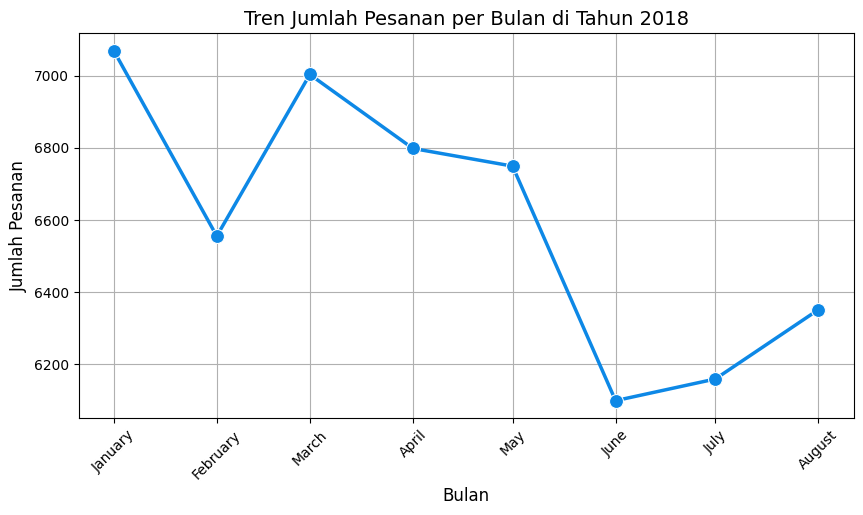

In [32]:
# filter data order yg Completed (sudah selesai) pada tahun 2018
completed_orders_2018 = orders_df[
    (orders_df['order_status_category'] == 'Completed') & 
    (orders_df['order_purchase_timestamp'].dt.year == 2018)
]

monthly_orders = completed_orders_2018.groupby(completed_orders_2018['order_purchase_timestamp'].dt.to_period('M')).size()
monthly_orders.index = monthly_orders.index.to_timestamp()

# Plot grafik
plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_orders.index, y=monthly_orders.values, marker='o', color='#0d88e6', linewidth=2.5, markersize=10)

plt.xlabel("Bulan", fontsize=12)
plt.ylabel("Jumlah Pesanan", fontsize=12)
plt.title("Tren Jumlah Pesanan per Bulan di Tahun 2018", fontsize=14)

# Mengubah xticks menjadi nama bulan
plt.xticks(ticks=monthly_orders.index, labels=monthly_orders.index.strftime('%B'), rotation=45)

# Tampilkan grafik
plt.grid(True)
plt.show()

In [33]:
# menyimpan orders_df untuk dashboard
orders_df.to_csv("dashboard/orders_df.csv", index=False)

In [34]:
# membersihkan memori
gc.collect()

150

**Insight :**
- Terjadi penurunan jumlah pesanan yang signifikan pada bulan Februari dan Juni
- Terjadi peningkatan jumlah pesanan yang signifikan pada bulan Maret
- Jumlah pesanan paling tinggi tahun 2018 adalah pada bulan Januari
- Jumlah pesanan paling rendah tahun 2018 adalah pada bulan Juni

### Pertanyaan 2 : Bagaimana performa seller berdasarkan jumlah pesanan dan rating pelanggan?

Untuk menjawab pertanyaan ini, kita akan menggunakan 2 teknik analisis :
1) **Clustering (manual grouping)** untuk mengklasifikasi seller sebagai berikut
    - Elite Seller : jumlah pesanan tinggi dan rating tinggi
    - Growing Seller : jumlah pesanan rendah dan rating tinggi
    - At-Risk Seller : jumlah pesanan tinggi dan rating rendah
    - Dormant Seller : jumlah pesanan rendah dan rating rendah
2) **RFM Analysis** dengan :
    - Recency (R) : seberapa baru pesanan terakhir seller diterima
    - Frequency (F) : jumlah total pesanan yang diterima seller
    - Monetary (M) : Rata-rata rating pesanan seller

In [35]:
# menghitung jumlah pesanan per seller
seller_orders = orders_items_rating_df.groupby("seller_id")["order_id"].nunique().reset_index()
seller_orders.rename(columns={"order_id": "total_orders"}, inplace=True)

# menghitung rata-rata rating per seller
seller_ratings = orders_items_rating_df.groupby("seller_id")["rating"].mean().reset_index()

# menggabungkan jumlah pesanan dan rating menjadi satu DataFrame baru
seller_df = seller_orders.merge(seller_ratings, on="seller_id")

# menentukan threshold jumlah pesanan dan rating
order_threshold = seller_df["total_orders"].median() # menggunakan median
rating_threshold = 4  # Rating tinggi jika >= 4, rendah jika < 4

# membuat fungsi untuk mengkategorikan seller
def classify_seller(row):
    if row["total_orders"] >= order_threshold and row["rating"] >= rating_threshold:
        return "Elite Seller"
    elif row["total_orders"] < order_threshold and row["rating"] >= rating_threshold:
        return "Growing Seller"
    elif row["total_orders"] >= order_threshold and row["rating"] < rating_threshold:
        return "At-Risk Seller"
    else:
        return "Dormant Seller"

# menambahkan kategori seller ke dalam seller_df
seller_df["seller_category"] = seller_df.apply(classify_seller, axis=1)

seller_df["seller_category"].value_counts()

seller_category
Elite Seller      1066
Growing Seller     926
At-Risk Seller     586
Dormant Seller     517
Name: count, dtype: int64

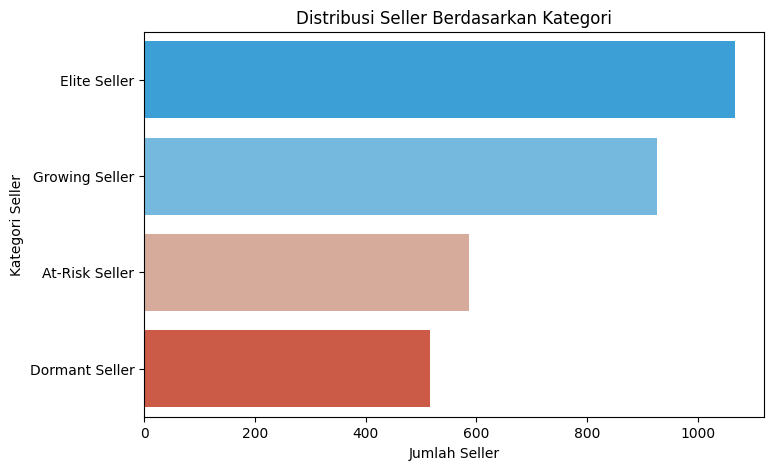

In [36]:
# membuat barchart untuk distribusi seller berdasarkan kategori

colors = ["#22a7f0", "#63bff0", "#e1a692", "#e14b31"]
category_counts = seller_df['seller_category'].value_counts()
category_order = ["Elite Seller", "Growing Seller", "At-Risk Seller", "Dormant Seller"]

category_counts = category_counts.reindex(category_order, fill_value=0)

plt.figure(figsize=(8, 5))
sns.barplot(x=category_counts.values, y=category_counts.index, palette=colors)

plt.xlabel("Jumlah Seller")
plt.ylabel("Kategori Seller")
plt.title("Distribusi Seller Berdasarkan Kategori")

plt.show()

In [37]:
# menyimpan seller_df untuk dashboard
seller_df.to_csv("dashboard/seller_df.csv", index=False)

In [38]:
# membuat dataframe RFM Analysis

# memastikan order_purchase_timestamp bertipe datetime
orders_df["order_purchase_timestamp"] = pd.to_datetime(orders_df["order_purchase_timestamp"])

# menggabungkan orders_items_df dengan orders_df untuk mendapatkan timestamp
merged_df = order_items_df.merge(orders_df[['order_id', 'order_purchase_timestamp']], on='order_id', how='left')

# menentukan tanggal pesanan terbaru untuk setiap seller_id
seller_latest_order = merged_df.groupby("seller_id")["order_purchase_timestamp"].max().reset_index()
seller_latest_order.rename(columns={"order_purchase_timestamp": "latest_order_date"}, inplace=True)

# mengonversi latest_order_date menjadi datetime
seller_latest_order["latest_order_date"] = pd.to_datetime(seller_latest_order["latest_order_date"])

# menentukan tanggal terbaru dari semua pesanan untuk menghitung Recency
latest_order_date = seller_latest_order["latest_order_date"].max()

# menggabungkan seller_df dengan seller_latest_order
merged_df = seller_df.merge(seller_latest_order, on="seller_id", how="left")

# menghitung RFM untuk setiap seller
rfm_df = merged_df.groupby('seller_id').agg(
    Recency=('latest_order_date', lambda x: (latest_order_date - x.max()).days),  # Selisih hari dari pesanan terakhir
    Frequency=('total_orders', 'sum'),  # Total pesanan per seller
    Monetary=('rating', 'mean')  # Rata-rata rating seller
).reset_index()

rfm_df.head()

seller_id  Recency  Frequency  Monetary
0  0015a82c2db000af6aaaf3ae2ecb0532      320          3  3.666667
1  001cca7ae9ae17fb1caed9dfb1094831       52        200  3.902542
2  001e6ad469a905060d959994f1b41e4f       26          1  1.000000
3  002100f778ceb8431b7a1020ff7ab48f      143         51  3.981818
4  003554e2dce176b5555353e4f3555ac8      262          1  5.000000

In [39]:
print("📌 5 Seller dengan Pesanan Terbaru (Recency Terkecil):")
print(rfm_df.nsmallest(5, 'Recency')[['seller_id', 'Recency']])
print("\n📌 5 Seller dengan Pesanan Terbanyak (Frequency Terbesar):")
print(rfm_df.nlargest(5, 'Frequency')[['seller_id', 'Frequency']])
print("\n📌 5 Seller dengan Rating Tertinggi (Monetary Terbesar):")
print(rfm_df.nlargest(5, 'Monetary')[['seller_id', 'Monetary']])

📌 5 Seller dengan Pesanan Terbaru (Recency Terkecil):
                             seller_id  Recency
440   25be943a321c8938947bdaabca979a90        0
151   0be8ff43f22e456b4e0371b2245e4d01        4
502   2a84855fd20af891be03bc5924d2b453        4
1169  5f2684dab12e59f83bef73ae57724e45        4
1235  6560211a19b47992c3666cc44a7e94c0        4

📌 5 Seller dengan Pesanan Terbanyak (Frequency Terbesar):
                             seller_id  Frequency
1235  6560211a19b47992c3666cc44a7e94c0       1854
881   4a3ca9315b744ce9f8e9374361493884       1806
2481  cc419e0650a3c5ba77189a1882b7556a       1706
368   1f50f920176fa81dab994f9023523100       1404
2643  da8622b14eb17ae2831f4ac5b9dab84a       1314

📌 5 Seller dengan Rating Tertinggi (Monetary Terbesar):
                           seller_id  Monetary
4   003554e2dce176b5555353e4f3555ac8       5.0
7   00ab3eff1b5192e5f1a63bcecfee11c8       5.0
8   00d8b143d12632bad99c0ad66ad52825       5.0
14  01266d4c46afa519678d16a8b683d325       5.0
22  01e

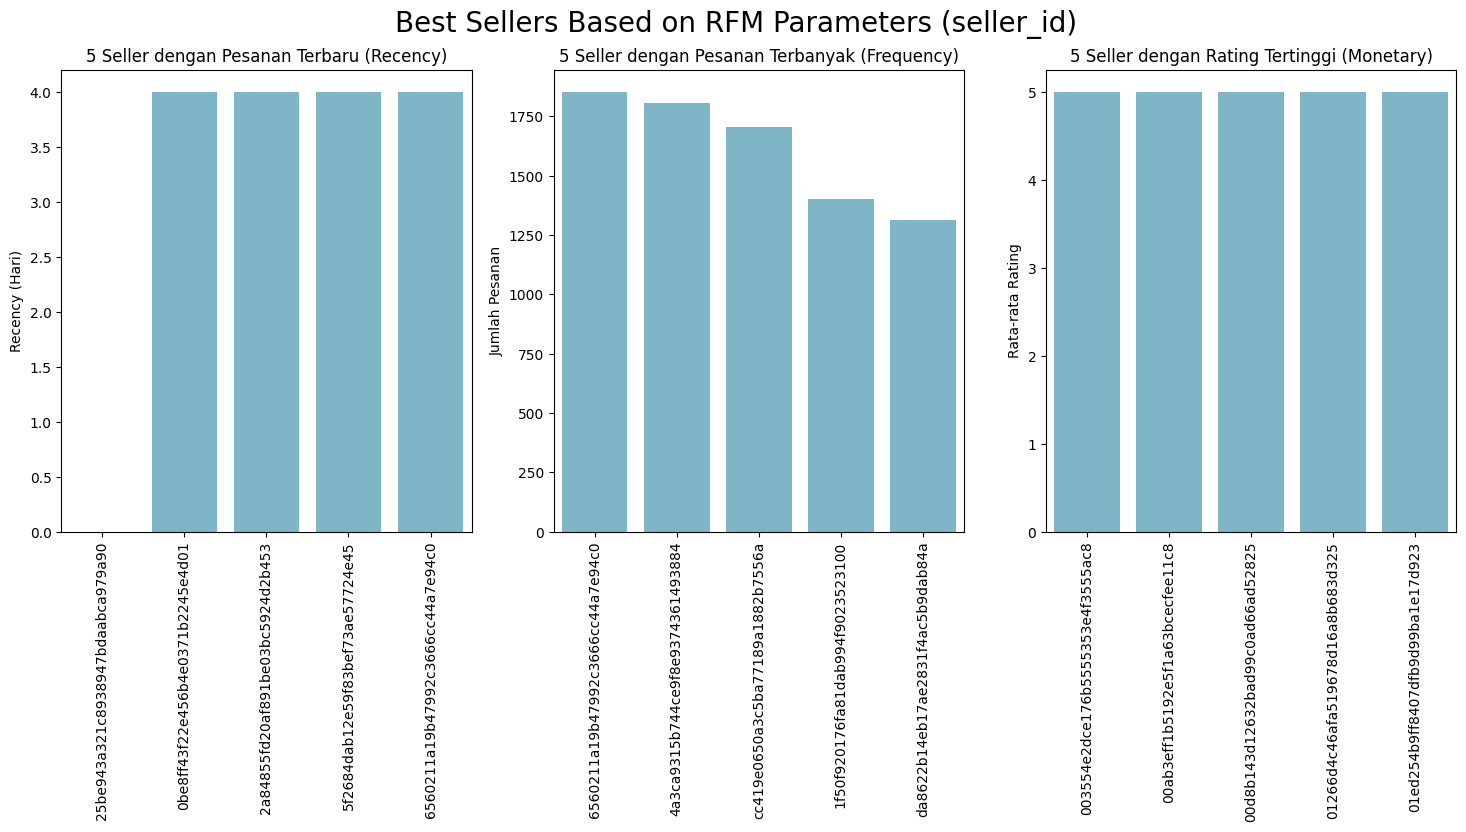

In [40]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Warna untuk barplot
colors_g = ["#72BCD4"] * 5

# Plot Recency (terbaru = nilai kecil)
sns.barplot(y="Recency", x="seller_id", 
            data=rfm_df.nsmallest(5, "Recency"), 
            palette=colors_g, ax=ax[0])
ax[0].set_title("5 Seller dengan Pesanan Terbaru (Recency)")
ax[0].set_xlabel(None)
ax[0].set_ylabel("Recency (Hari)")
ax[0].tick_params(axis="x", rotation=90)

# Plot Frequency (terbanyak = nilai besar)
sns.barplot(y="Frequency", x="seller_id", 
            data=rfm_df.nlargest(5, "Frequency"), 
            palette=colors_g, ax=ax[1])
ax[1].set_title("5 Seller dengan Pesanan Terbanyak (Frequency)")
ax[1].set_xlabel(None)
ax[1].set_ylabel("Jumlah Pesanan")
ax[1].tick_params(axis="x", rotation=90)

# Plot Monetary (tertinggi = nilai besar)
sns.barplot(y="Monetary", x="seller_id", 
            data=rfm_df.nlargest(5, "Monetary"), 
            palette=colors_g, ax=ax[2])
ax[2].set_title("5 Seller dengan Rating Tertinggi (Monetary)")
ax[2].set_xlabel(None)
ax[2].set_ylabel("Rata-rata Rating")
ax[2].tick_params(axis="x", rotation=90)

plt.suptitle("Best Sellers Based on RFM Parameters (seller_id)", fontsize=20)
plt.show()


In [41]:
# menyimpan rfm_df untuk dashboard
rfm_df.to_csv("dashboard/rfm_df.csv", index=False)

In [42]:
# membersihkan memori
gc.collect()

6060

**Insight :** <br>
Berdasarkan clustering dengan manual grouping, dari 3095 seller, terdapat :
- 1066 atau 34.44% seller yang merupakan Elite Seller, yaitu seller dengan jumlah pesanan tinggi dan rating tinggi
- 926 atau 29.92% seller yang merupakan Growing Seller, yaitu seller dengan jumlah pesanan rendah dan rating tinggi
- 586 atau 18.93% seller yang merupakan At-Risk Seller, yaitu seller dengan jumlah pesanan tinggi dan rating rendah
- 517 atau 16.71% seller yang merupakan Dormant Seller, yaitu seller dengan jumlah pesanan rendah dan rating rendah

Berdasarkan RFM Analysis :
- Recency : Seller dengan pesanan terbaru adalah seller dengan id 25be943a321c8938947bdaabca979a90
- Frequency : Seller dengan pesanan terbanyak adalah seller dengan id 6560211a19b47992c3666cc44a7e94c0
- Monetary : Seller dengan rating tertinggi adalah seller dengan id 003554e2dce176b5555353e4f3555ac8

### Pertanyaan 3 : Bagaimana distribusi geografis seller berdasarkan kode pos dan koordinat?

Pada tahap Visualization, kita berfokus pada **penyajian data menggunakan visualisasi** untuk memahami pola, tren, serta hubungan antar variabel dalam data. Dengan menggunakan grafik, diagram, dan statistik ringkas, kita dapat menggali wawasan yang lebih dalam dari data yang tersedia. Explanatory analysis merupakan proses analisis data yang bertujuan untuk **membagikan beberapa insight yang menarik dari sebuah data, sehingga hasil analisis dapat lebih mudah dipahami dan diinterpretasikan**. <br> <br>
Pada proyek ini, kita akan melakukan visualization dan explanatory analysis berdasarkan pertanyaan bisnis yang sudah kita tentukan sebelumnya.

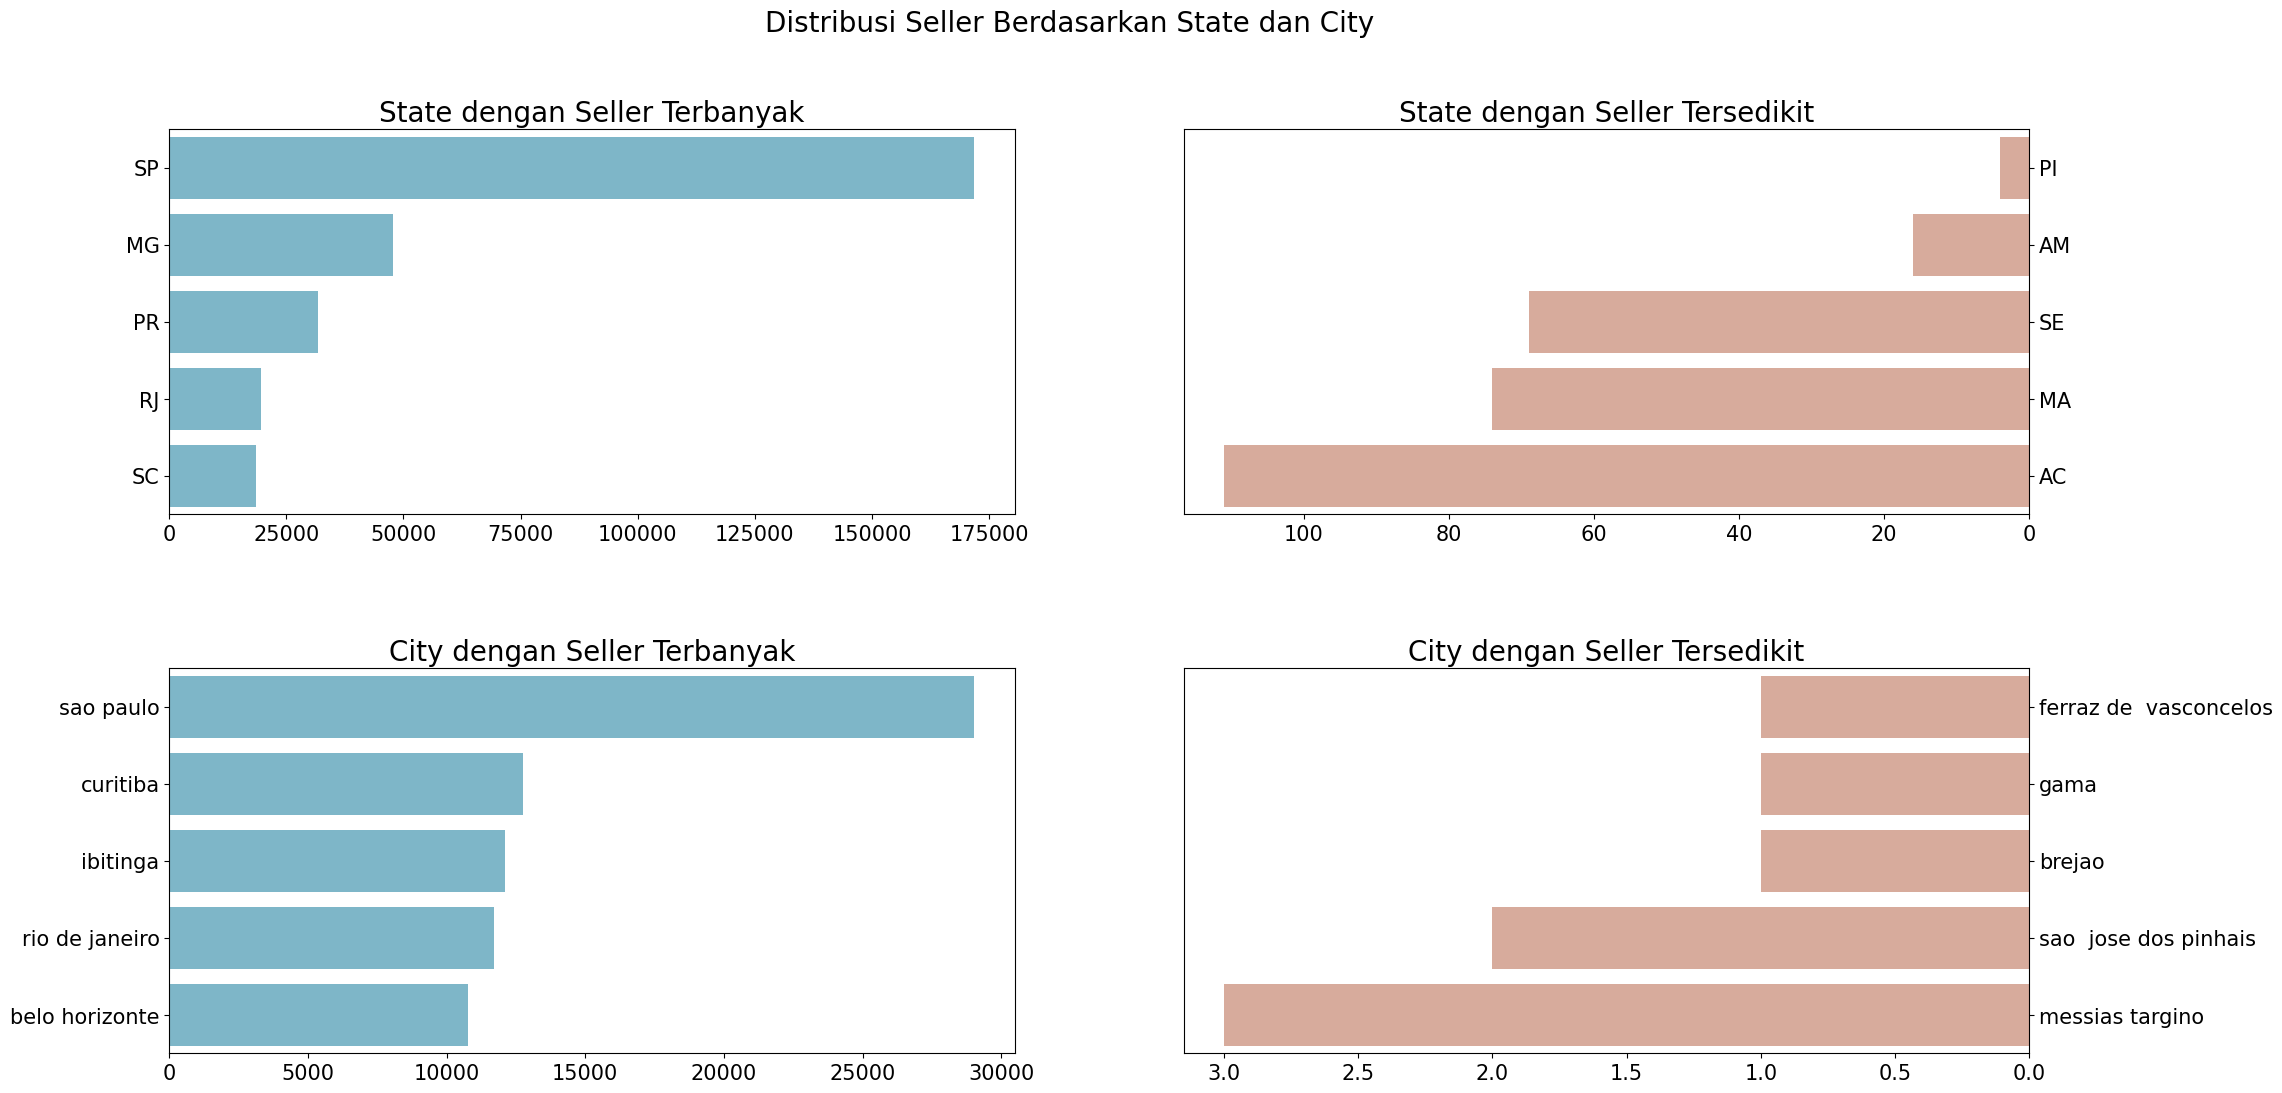

In [43]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(24, 12))

colors_b = ["#72BCD4"] * 5  # warna untuk grafik terbanyak
colors_s = ["#e1a692"] * 5  # warna untuk grafik tersedikit

# --- ROW 1: Seller per STATE ---
# menghitung jumlah seller per state
state_counts = sellers_geolocation_df["seller_state"].value_counts().reset_index()
state_counts.columns = ["seller_state", "count"]

# plot state dengan seller terbanyak
sns.barplot(x="count", y="seller_state", data=state_counts.head(5), palette=colors_b, ax=ax[0, 0])
ax[0, 0].set_ylabel(None)
ax[0, 0].set_xlabel(None)
ax[0, 0].set_title("State dengan Seller Terbanyak", loc="center", fontsize=20)
ax[0, 0].tick_params(axis="y", labelsize=15)
ax[0, 0].tick_params(axis="x", labelsize=15)

# plot state dengan seller tersedikit
sns.barplot(
    x="count",
    y="seller_state",
    data=state_counts.sort_values(by="count", ascending=True).head(5),
    palette=colors_s,
    ax=ax[0, 1]
)
ax[0, 1].set_ylabel(None)
ax[0, 1].set_xlabel(None)
ax[0, 1].invert_xaxis()
ax[0, 1].yaxis.set_label_position("right")
ax[0, 1].yaxis.tick_right()
ax[0, 1].set_title("State dengan Seller Tersedikit", loc="center", fontsize=20)
ax[0, 1].tick_params(axis="y", labelsize=15)
ax[0, 1].tick_params(axis="x", labelsize=15)

# --- ROW 2: Seller per CITY ---
# menghitung jumlah seller per city
city_counts = sellers_geolocation_df["seller_city"].value_counts().reset_index()
city_counts.columns = ["seller_city", "count"]

# plot city dengan seller terbanyak
sns.barplot(x="count", y="seller_city", data=city_counts.head(5), palette=colors_b, ax=ax[1, 0])
ax[1, 0].set_ylabel(None)
ax[1, 0].set_xlabel(None)
ax[1, 0].set_title("City dengan Seller Terbanyak", loc="center", fontsize=20)
ax[1, 0].tick_params(axis="y", labelsize=15)
ax[1, 0].tick_params(axis="x", labelsize=15)

# plot city dengan seller tersedikit
sns.barplot(
    x="count",
    y="seller_city",
    data=city_counts.sort_values(by="count", ascending=True).head(5),
    palette=colors_s,
    ax=ax[1, 1]
)
ax[1, 1].set_ylabel(None)
ax[1, 1].set_xlabel(None)
ax[1, 1].invert_xaxis()
ax[1, 1].yaxis.set_label_position("right")
ax[1, 1].yaxis.tick_right()
ax[1, 1].set_title("City dengan Seller Tersedikit", loc="center", fontsize=20)
ax[1, 1].tick_params(axis="y", labelsize=15)
ax[1, 1].tick_params(axis="x", labelsize=15)

# supTitle untuk tiap baris
fig.suptitle("Distribusi Seller Berdasarkan State dan City", fontsize=20)
plt.subplots_adjust(hspace=0.4)  # Memberikan jarak antar baris
plt.show()


In [44]:
# menyimpan sellers_geolocation_df untuk dashboard
sellers_geolocation_df.to_csv("dashboard/sellers_geolocation_df.csv", index=False)

In [45]:
sellers_geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311796 entries, 0 to 311795
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   seller_id               311796 non-null  object 
 1   seller_zip_code_prefix  311796 non-null  int64  
 2   seller_city             311796 non-null  object 
 3   seller_state            311796 non-null  object 
 4   geolocation_lat         311789 non-null  float64
 5   geolocation_lng         311789 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 14.3+ MB


In [46]:
sellers_geolocation_df.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
geolocation_lat           7
geolocation_lng           7
dtype: int64

In [47]:
sellers_geolocation_df = sellers_geolocation_df.dropna()

In [48]:
# membersihkan memori
gc.collect()

9810

In [49]:
# Geospatial Analysis tetapi mengambil sampel seller 100 setiap state nya untuk meringankan kinerja komputer

# jumlah sampel per state
N = 100  

# mengambil sampel per state
sellers_sample = (
    sellers_geolocation_df.groupby("seller_state")
    .apply(lambda x: x.sample(n=min(N, len(x)), random_state=42))
    .reset_index(drop=True)
)

# membuat peta
m = folium.Map(location=[-23.5505, -46.6333], zoom_start=5)

# menambahkan MarkerCluster
marker_cluster = MarkerCluster().add_to(m)

# menambahkan marker ke peta
for idx, row in sellers_sample.iterrows():
    folium.Marker(
        location=[row["geolocation_lat"], row["geolocation_lng"]],
        popup=f"Seller ID: {row['seller_id']}\nCity: {row['seller_city']}\nState: {row['seller_state']}",
        icon=folium.Icon(color="red", icon="shopping-cart"),
    ).add_to(marker_cluster)

m

**Insight :**
- Seller paling banyak berada di state SP dan paling sedikit di state PI
- Seller paling banyak berada di Kota Sao Paulo dan paling sedikit di Kota Ferraz de Vasconcelos

## Conclusion

**1.** Berdasarkan analisis tren jumlah pesanan e-commerce **pada tahun 2018, terjadi fluktuasi signifikan dalam beberapa bulan terakhir**. Jumlah pesanan mengalami **penurunan yang tajam pada bulan Februari dan Juni**, sementara pada **bulan Maret terjadi peningkatan yang signifikan** dibandingkan bulan sebelumnya. **Jumlah pesanan tertinggi sepanjang tahun 2018 tercatat pada bulan Januari, sedangkan bulan Juni mencatat jumlah pesanan terendah.**
<br><br>
**2.** Berdasarkan **analisis clustering dengan manual grouping**, performa seller dapat dikategorikan ke dalam empat kelompok utama. **Elite Seller (34.44%)** merupakan kelompok dengan performa terbaik, memiliki jumlah pesanan tinggi serta rating pelanggan yang tinggi. **Growing Seller (29.92%)** menunjukkan potensi pertumbuhan karena meskipun jumlah pesanannya masih rendah, mereka memiliki rating pelanggan yang tinggi. Di sisi lain, **At-Risk Seller (18.93%)** memiliki jumlah pesanan tinggi tetapi rating rendah, yang menunjukkan adanya risiko dalam kualitas layanan mereka. Sementara itu, **Dormant Seller (16.71%)** merupakan kelompok dengan performa paling rendah, dengan jumlah pesanan dan rating yang sama-sama rendah.

Selain itu, berdasarkan **RFM Analysis**, seller dengan performa terbaik dalam masing-masing aspek adalah:
- Recency: Seller dengan ID 25be943a321c8938947bdaabca979a90 merupakan seller dengan pesanan terbaru.
- Frequency: Seller dengan ID 6560211a19b47992c3666cc44a7e94c0 memiliki jumlah pesanan terbanyak.
- Monetary: Seller dengan ID 003554e2dce176b5555353e4f3555ac8 memiliki rating tertinggi.

Analisis ini menunjukkan bahwa meskipun terdapat seller dengan performa sangat baik, masih ada kelompok seller yang memerlukan peningkatan baik dari segi jumlah pesanan maupun kepuasan pelanggan.
<br><br>
**3.** Distribusi geografis seller menunjukkan bahwa **sebagian besar seller terpusat di State São Paulo (SP)**, menjadikannya wilayah dengan jumlah seller terbanyak. Sebaliknya, **State Piauí (PI) memiliki jumlah seller paling sedikit**. <br>
Pada tingkat kota, **São Paulo menjadi kota dengan konsentrasi seller tertinggi, sementara Ferraz de Vasconcelos memiliki jumlah seller paling sedikit**.<br>
Distribusi ini mencerminkan bahwa **aktivitas e-commerce lebih terkonsentrasi di wilayah dengan pusat ekonomi besar** seperti São Paulo, sementara **daerah dengan aktivitas bisnis yang lebih rendah memiliki jumlah seller yang lebih sedikit**.